In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from layer import layer
from network import neural_network
from sklearn.model_selection import train_test_split


In [2]:
# load the data
import csv
def load_data():
    with open('data/heart.csv') as file:
        reader = csv.reader(file)
        headers = next(reader)
        data = np.array(list(reader) , dtype= np.float64)
# seperate input and labels
# last column is the labels
    Y = data[:,-1]
    # remove labels from data
    X = data[:,:-1]
    # normalize the data
    # i will be dividing each value with the max value in the column
    X = X / X.max(axis=0)
    return headers,X,Y


In [3]:
# split data into train and test 
headers, X , Y = load_data()
x_train , x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

# reshape lables arrays
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [4]:
# define M and N for training samples
M = x_train.shape[0]
N = x_train.shape[1]

In [5]:
# create a model
model = neural_network()

# create the layers of the model
model.sequential(
    [
        layer(N,1,"sigmoid"),
        # layer(20,1,"sigmoid")
    ]
)

In [6]:
# train the model
model, costs = model.fit(x_train,y_train,0.012,300000)

M : 242
M//10 : 30000
M//100 : 3000
0 cost : 0.7797400522619228 accuracy : 58.26%
30000 cost : 0.35672671191361005 accuracy : 84.3%
60000 cost : 0.35041284714146154 accuracy : 84.71%
90000 cost : 0.34755530539248664 accuracy : 84.3%
120000 cost : 0.3458998088250604 accuracy : 84.3%
150000 cost : 0.344829230612415 accuracy : 84.3%
180000 cost : 0.344100115735336 accuracy : 84.3%
210000 cost : 0.3435906377991017 accuracy : 84.3%
240000 cost : 0.3432294861298244 accuracy : 83.88%
270000 cost : 0.34297108066789334 accuracy : 83.88%
 cost : 0.3428009306297078 accuracy : 83.47%


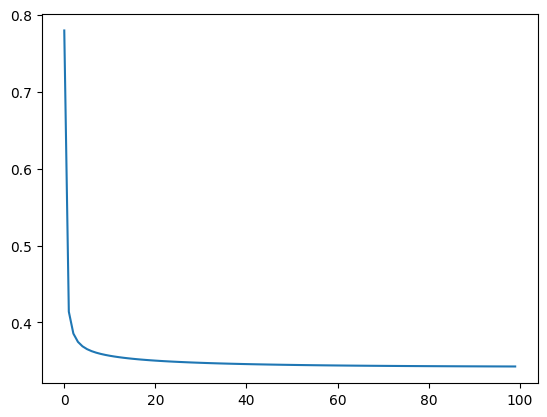

In [7]:
plt.plot(costs)

In [8]:
accuracy = ((x_test.shape[0] - np.sum((model.predict(x_test) != y_test).astype(int))) / x_test.shape[0] ) * 100

In [9]:
accuracy

83.60655737704919